# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dom pedrito
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | barra dos coqueiros
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | lata
Processing Record 13 of Set 1 | iskateley
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | petropavlovsk-kamchatsky
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | nuriootpa
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | san patricio
Processing Record 

In [18]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dom pedrito,-30.9828,-54.6731,7.56,91,5,2.74,BR,1683785699
1,georgetown,5.4112,100.3354,33.96,66,20,4.63,MY,1683785811
2,college,64.8569,-147.8028,13.99,44,75,2.06,US,1683785811
3,barra dos coqueiros,-10.9089,-37.0386,24.01,94,40,2.06,BR,1683785811
4,adamstown,-25.0660,-130.1015,22.06,54,100,9.52,PN,1683785811


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

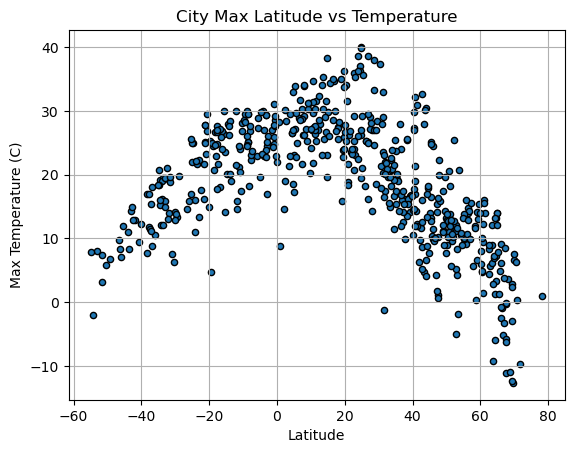

In [31]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', 
                          y='Max Temp',
                          marker='o',
                          edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

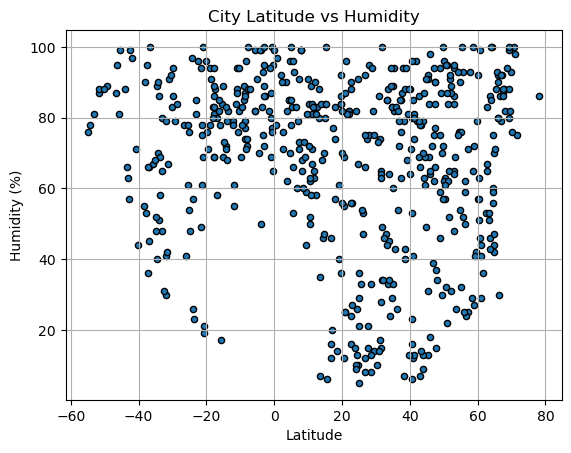

In [32]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', 
                          y='Humidity',
                          marker='o',
                          edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

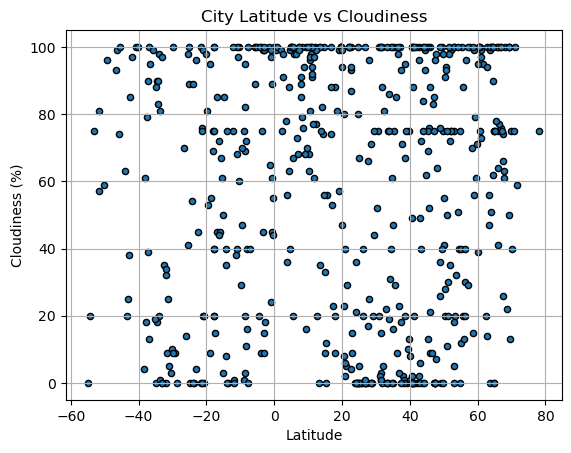

In [33]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', 
                          y='Cloudiness',
                          marker='o',
                          edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

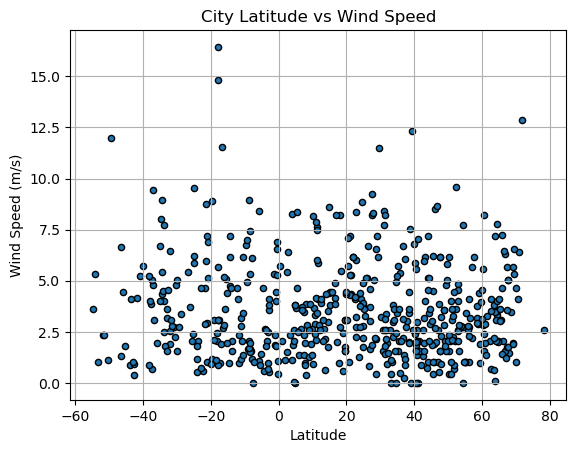

In [34]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', 
                          y='Wind Speed',
                          marker='o',
                          edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [99]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values, y_values, x_label, y_label, text_location):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,text_location,fontsize=15,color="red")
    
    print(f"The r-value is: {rvalue**2}")


In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,georgetown,5.4112,100.3354,33.96,66,20,4.63,MY,1683785811
2,college,64.8569,-147.8028,13.99,44,75,2.06,US,1683785811
7,bilibino,68.0546,166.4372,3.57,82,100,1.45,RU,1683785812
11,lata,40.1629,-8.3327,10.60,88,8,2.40,PT,1683785812
12,iskateley,67.6803,53.1512,-0.22,88,61,5.02,RU,1683785812


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dom pedrito,-30.9828,-54.6731,7.56,91,5,2.74,BR,1683785699
3,barra dos coqueiros,-10.9089,-37.0386,24.01,94,40,2.06,BR,1683785811
4,adamstown,-25.0660,-130.1015,22.06,54,100,9.52,PN,1683785811
5,port mathurin,-19.6833,63.4167,25.33,76,81,8.92,MU,1683785812
6,bredasdorp,-34.5322,20.0403,15.30,89,90,8.96,ZA,1683785705


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6163877286391155


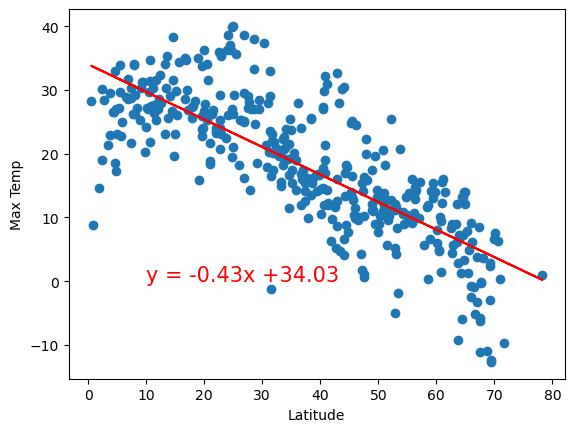

In [101]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
text_location = (10,0)
linear_reg_plot(x_values, y_values, 'Latitude', 'Max Temp', text_location)

The r-value is: 0.6215132049150456


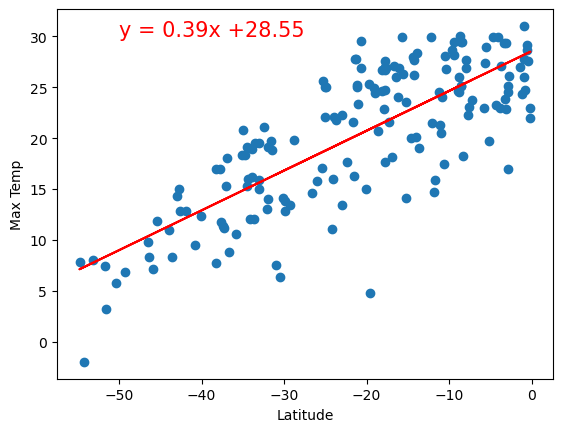

In [102]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
text_location = (-50,30)
linear_reg_plot(x_values, y_values, 'Latitude', 'Max Temp', text_location)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002865604961067054


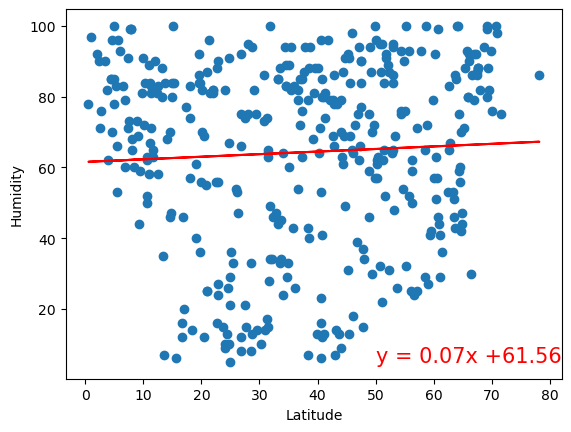

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
text_location = (50, 5)
linear_reg_plot(x_values, y_values, 'Latitude', 'Humidity', text_location)

The r-value is: 0.04127486345167769


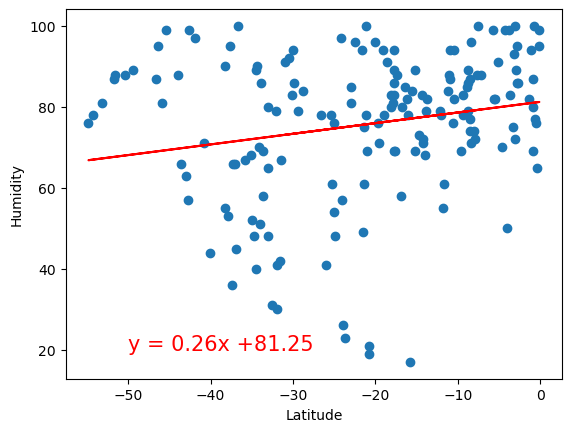

In [106]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
text_location = (-50, 20)
linear_reg_plot(x_values, y_values, 'Latitude', 'Humidity', text_location)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0013926891421997757


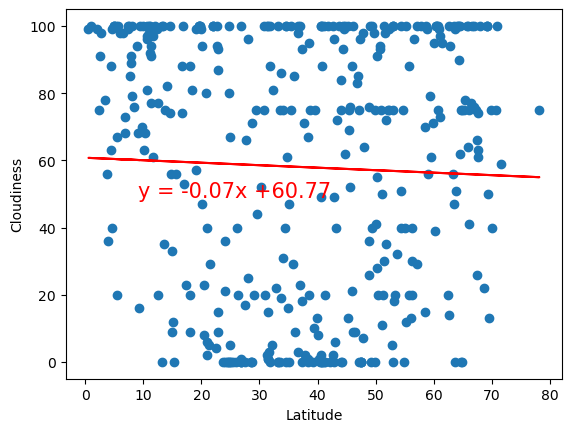

In [114]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
text_location = (9, 49)
linear_reg_plot(x_values, y_values, 'Latitude', 'Cloudiness', text_location)

The r-value is: 0.0030661142300209


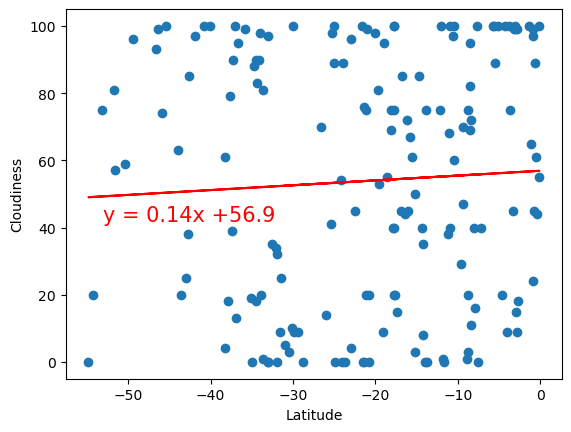

In [115]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
text_location = (-53, 42)
linear_reg_plot(x_values, y_values, 'Latitude', 'Cloudiness', text_location)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.001819339383484826


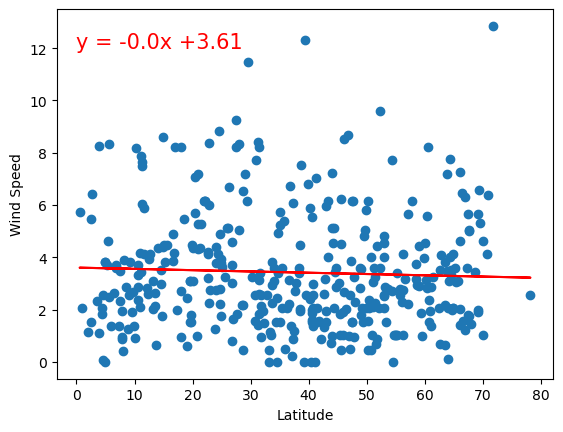

In [117]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
text_location = (0, 12)
linear_reg_plot(x_values, y_values, 'Latitude', 'Wind Speed', text_location)

The r-value is: 0.005606308092207669


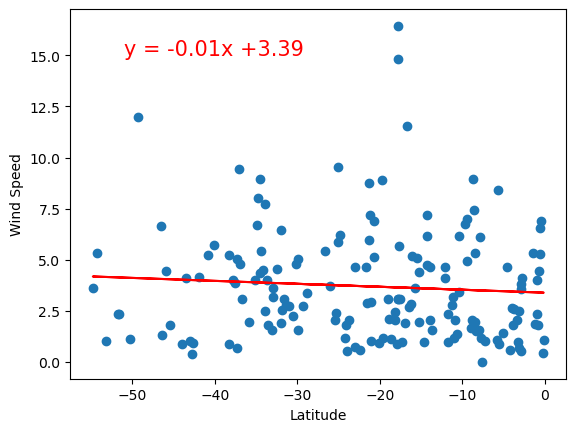

In [118]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
text_location = (-51, 15)
linear_reg_plot(x_values, y_values, 'Latitude', 'Wind Speed', text_location)

**Discussion about the linear relationship:** YOUR RESPONSE HERE